In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import SGD

In [47]:
# Cell 2 - Load CSVs (no functions, sequential code)
# --- MNIST (CSV expected to have a 'label' column or last column as label) ---
df_train = pd.read_csv('datasets/mnist_train.csv')
df_test  = pd.read_csv('datasets/mnist_test.csv')

# Determine label column (prefer 'label' if present)
if 'label' in df_train.columns:
    label_col = 'label'
else:
    label_col = df_train.columns[-1]

# Extract features and labels (MNIST: 784 pixel columns)
X_train = df_train.drop(columns=[label_col]).to_numpy().astype('float32')
y_train = df_train[label_col].to_numpy().astype(int)

X_test  = df_test.drop(columns=[label_col]).to_numpy().astype('float32')
y_test  = df_test[label_col].to_numpy().astype(int)

print("Loaded MNIST CSV shapes:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

# --- If you want to use CIFAR CSV instead, uncomment & adapt these lines ---
# df_train = pd.read_csv("cifar_train.csv")
# df_test  = pd.read_csv("cifar_test.csv")
# label_col = 'label' if 'label' in df_train.columns else df_train.columns[-1]
# X_train = df_train.drop(columns=[label_col]).to_numpy().astype('float32')  # expect 3072 columns
# y_train = df_train[label_col].to_numpy().astype(int)
# X_test  = df_test.drop(columns=[label_col]).to_numpy().astype('float32')
# y_test  = df_test[label_col].to_numpy().astype(int)
# print("Loaded CIFAR CSV shapes:", X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Loaded MNIST CSV shapes: (60000, 784) (60000,) (10000, 784) (10000,)


In [48]:
# Cell 3 - Preprocess (normalize & one-hot encode) for MNIST
# MNIST pixel range 0-255 -> scale to 0-1
X_train = X_train / 255.0
X_test  = X_test  / 255.0

input_dim = X_train.shape[1]   # should be 784 for MNIST
num_classes = len(np.unique(y_train))

y_train_cat = to_categorical(y_train, num_classes)
y_test_cat  = to_categorical(y_test, num_classes)

print("Input dim:", input_dim, "Num classes:", num_classes)


Input dim: 784 Num classes: 10


In [49]:
# Cell 4 - Define Feedforward network (MLP) and compile with SGD
model = Sequential([
    Input(shape=(input_dim,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Cell 5 - Train using SGD for 11 epochs
epochs = 11
batch_size = 128

history = model.fit(
    X_train, y_train_cat,
    validation_data=(X_test, y_test_cat),
    epochs=epochs,
    batch_size=batch_size,
    verbose=2
)


Epoch 1/11
469/469 - 9s - 20ms/step - accuracy: 0.8800 - loss: 0.4368 - val_accuracy: 0.9336 - val_loss: 0.2295
Epoch 2/11
469/469 - 7s - 14ms/step - accuracy: 0.9446 - loss: 0.1946 - val_accuracy: 0.9518 - val_loss: 0.1572
Epoch 3/11
469/469 - 6s - 14ms/step - accuracy: 0.9593 - loss: 0.1419 - val_accuracy: 0.9635 - val_loss: 0.1250
Epoch 4/11
469/469 - 6s - 14ms/step - accuracy: 0.9683 - loss: 0.1112 - val_accuracy: 0.9684 - val_loss: 0.1077
Epoch 5/11
469/469 - 7s - 14ms/step - accuracy: 0.9734 - loss: 0.0912 - val_accuracy: 0.9714 - val_loss: 0.0947
Epoch 6/11
469/469 - 7s - 14ms/step - accuracy: 0.9782 - loss: 0.0758 - val_accuracy: 0.9735 - val_loss: 0.0875
Epoch 7/11
469/469 - 7s - 14ms/step - accuracy: 0.9816 - loss: 0.0642 - val_accuracy: 0.9743 - val_loss: 0.0857
Epoch 8/11
469/469 - 6s - 14ms/step - accuracy: 0.9846 - loss: 0.0547 - val_accuracy: 0.9763 - val_loss: 0.0793
Epoch 9/11
469/469 - 6s - 13ms/step - accuracy: 0.9870 - loss: 0.0469 - val_accuracy: 0.9758 - val_loss:

In [51]:
# Cell 6 - Evaluate on test set and show classification report + confusion matrix
loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Loss: {loss:.4f}   Test Accuracy: {acc*100:.2f}%\n")

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification report:\n")
print(classification_report(y_test, y_pred, digits=4))

print("Confusion matrix:\n")
cm = confusion_matrix(y_test, y_pred)
print(cm)


Test Loss: 0.0710   Test Accuracy: 97.71%

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Classification report:

              precision    recall  f1-score   support

           0     0.9837    0.9857    0.9847       980
           1     0.9886    0.9921    0.9903      1135
           2     0.9787    0.9787    0.9787      1032
           3     0.9878    0.9614    0.9744      1010
           4     0.9707    0.9796    0.9752       982
           5     0.9345    0.9910    0.9619       892
           6     0.9893    0.9645    0.9767       958
           7     0.9776    0.9767    0.9771      1028
           8     0.9802    0.9682    0.9742       974
           9     0.9771    0.9722    0.9747      1009

    accuracy                         0.9771     10000
   macro avg     0.9768    0.9770    0.9768     10000
weighted avg     0.9774    0.9771    0.9771     10000

Confusion matrix:

[[ 966    0    2    0    1    5    2    1    2    1]
 [   0 1126    3    0    0    1    2    1    2    0]
 [   3  

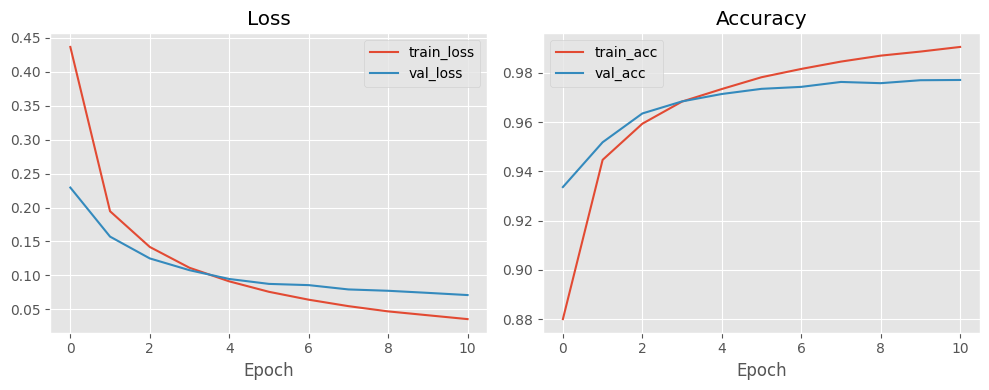

In [52]:
# Cell 7 - Plot training loss and accuracy
plt.style.use("ggplot")
ep = range(len(history.history['loss']))

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(ep, history.history['loss'], label='train_loss')
plt.plot(ep, history.history['val_loss'], label='val_loss')
plt.title('Loss'); plt.xlabel('Epoch'); plt.legend()

plt.subplot(1,2,2)
plt.plot(ep, history.history['accuracy'], label='train_acc')
plt.plot(ep, history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.legend()

plt.tight_layout()
plt.show()
